In [34]:
from sklearn import datasets

In [35]:
data = datasets.load_breast_cancer()

In [36]:
columns = data['feature_names']

In [37]:
X = data['data']
Y = data['target']

In [38]:
X.shape

(569, 30)

In [39]:
Y.shape

(569,)

In [40]:
import pandas as pd

In [41]:
df = pd.DataFrame(X, columns=columns)

In [42]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [44]:
X = (X - X.min()) / (X.max() - X.min())  # min-max normalization

In [45]:
from sklearn.decomposition import PCA  # get principal components due to high dimensionality of the dataset

In [51]:
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [116]:
pca.explained_variance_ratio_

array([0.98204467, 0.01617649])

In [47]:
import matplotlib.pyplot as plt

In [48]:
colors = ['blue' if y else 'red' for y in Y]

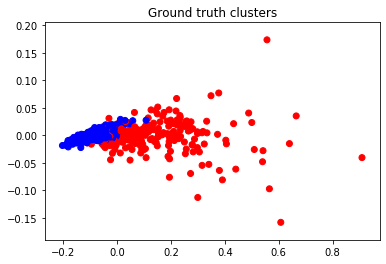

In [52]:
plt.title('Ground truth clusters')
plt.scatter(X2D[:, 0], X2D[:, 1], c=colors)

In [53]:
import scipy.cluster.hierarchy as shc

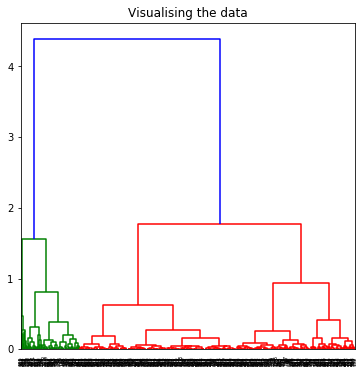

In [119]:
plt.figure(figsize =(6, 6)) 
plt.title('Visualising the data') 
shc.dendrogram((shc.linkage(X2D, method='ward'))) 
plt.show()

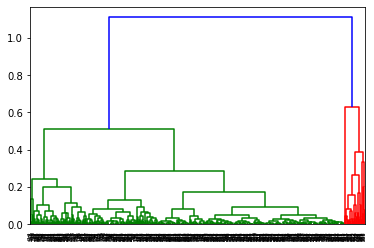

In [55]:
shc.dendrogram((shc.linkage(X2D, method='complete'))) 
plt.show()

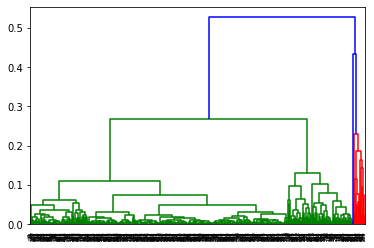

In [56]:
shc.dendrogram((shc.linkage(X2D, method='average'))) 
plt.show()

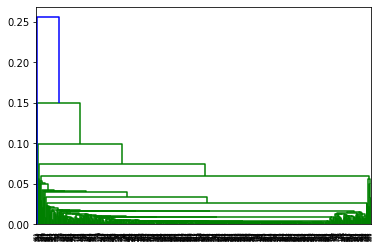

In [120]:
shc.dendrogram((shc.linkage(X2D, method='single'))) 
plt.show()

In [60]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

In [66]:
def calc_metrics(clf, y):
    h = metrics.homogeneity_score(y.ravel(), clf.labels_)
    c = metrics.completeness_score(y.ravel(), clf.labels_)
    v = metrics.v_measure_score(y.ravel(), clf.labels_)
    return h, c, v

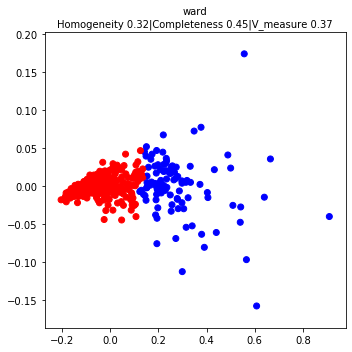

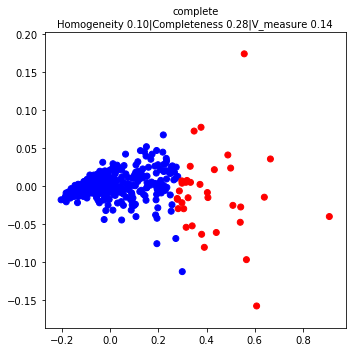

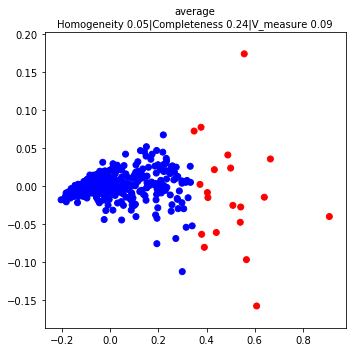

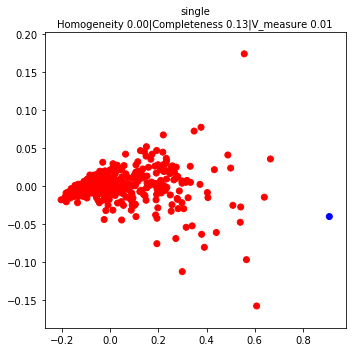

In [115]:
for linkage in ('ward', 'complete', 'average', 'single'):
    clustering = AgglomerativeClustering(linkage=linkage)
    clustering.fit(X2D)
    h, c, v = calc_metrics(clustering, Y)
    colors = ['blue' if y else 'red' for y in clustering.labels_]
    fig = plt.figure()
    fig.set_size_inches((5,5))
    plt.title("%(linkage)s\nHomogeneity %(h).2f|Completeness %(c).2f|V_measure %(v).2f" % {
        'linkage': linkage, 'h': h, 'c': c, 'v': v
    }, size=10)
    plt.scatter(X2D[:, 0], X2D[:, 1], c=colors)
    plt.tight_layout()

    
plt.show()

In [97]:
from sklearn.neighbors import kneighbors_graph

/Users/guilhermemarques/.virtualenvs/mlProjects/lib/python3.7/site-packages/sklearn/cluster/hierarchical.py:244: UserWarning: the number of connected components of the connectivity matrix is 24 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')
/Users/guilhermemarques/.virtualenvs/mlProjects/lib/python3.7/site-packages/sklearn/cluster/hierarchical.py:473: UserWarning: the number of connected components of the connectivity matrix is 24 > 1. Completing it to avoid stopping the tree early.
  affinity=affinity)
/Users/guilhermemarques/.virtualenvs/mlProjects/lib/python3.7/site-packages/sklearn/cluster/hierarchical.py:473: UserWarning: the number of connected components of the connectivity matrix is 24 > 1. Completing it to avoid stopping the tree early.
  affinity=affinity)
/Users/guilhermemarques/.virtualenvs/mlProjects/lib/python3.7/site-packages/sklearn/cluster/hierarchical.py:473: UserWarning: the number of connected components of the connectivity matrix is 24

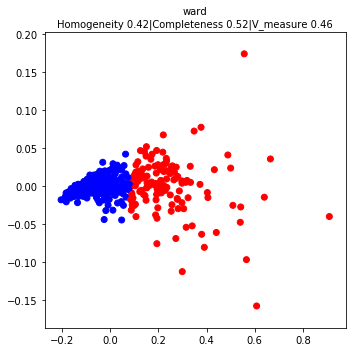

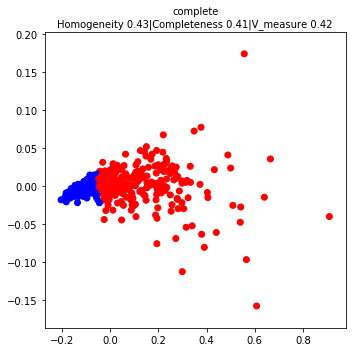

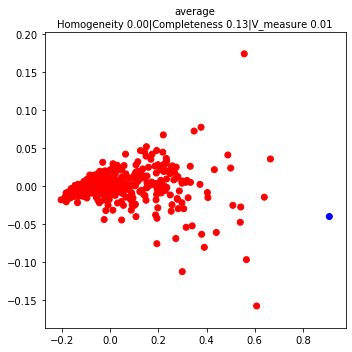

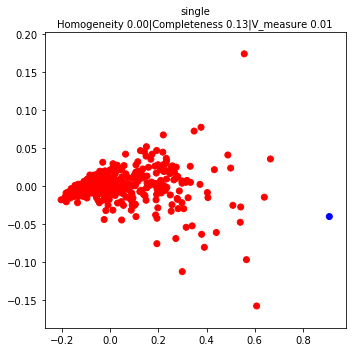

In [114]:
knn_graph = kneighbors_graph(X2D, 2)
connectivity = knn_graph.toarray()
for linkage in ('ward', 'complete', 'average', 'single'):
    clustering = AgglomerativeClustering(linkage=linkage, connectivity=connectivity)
    clustering.fit(X2D)
    h, c, v = calc_metrics(clustering, Y)
    colors = ['blue' if y else 'red' for y in clustering.labels_]
    fig = plt.figure()
    fig.set_size_inches((5,5))
    plt.title("%(linkage)s\nHomogeneity %(h).2f|Completeness %(c).2f|V_measure %(v).2f" % {
        'linkage': linkage, 'h': h, 'c': c, 'v': v
    }, size=10)
    plt.scatter(X2D[:, 0], X2D[:, 1], c=colors)
    plt.tight_layout()

    
plt.show()